Kaggle juga ada kursus gratis (sudah kukerjakan)

In [ ]:
import os
os.listdir('sample_data')

In [ ]:
#konversi pandas dataframe
import pandas as pd
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

In [ ]:
#normalization -> mengubah nilai-nilai dari sebuah fitur ke dalam skala yang sama (buat mesin gampang latihan, normal kalo manusia gapaham angka angkanya)
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))

In [ ]:
#standardization -> proses konversi nilai-nilai dari suatu fitur sehingga nilai-nilai tersebut memiliki skala yang sama
#Z = value - mean / standard deviation
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data

In [ ]:
#training set dan test set
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#bagi array X dan y ke 20% data testing, sudah dirandom sebelum di split, random state digunakan supaya data konsisten

X_data = range(10)
y_data = range(10)

print("random_state ditentukan")
for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
  print(y_test)


print("random_state tidak ditentukan")
for i in range(3):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=None)
  print(y_test)

In [ ]:
#latihan 2 sklearn train test split
import sklearn
from sklearn import datasets

#load datasets
iris = datasets.load_iris()

#pisahkan atribut dan label pada iris dataset
x=iris.data
y=iris.target

from sklearn .model_selection import train_test_split
#membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#menghitung panjang/jumlah data pada x_test
len(x_test) #output : 30 -> 20% dari 150

In [ ]:
#latihan 4 decision tree
import pandas as pd

#upload dataset ke colab
"""from google.colab import files
uploaded = files.upload()"""

#membaca file iris.csv
"""import io
iris = pd.read_csv(io.BytesIO(uploaded['Iris (2).csv']))""" #key iris.csv sesuaikan nama waktu tadi upload
iris = pd.read_csv('Iris.csv') #cara upload di colab -> bagian kiri ada file terus upload di storage session

#melihat informasi dataset
#iris.info()

#melihat informasi dataset 5 baris pertama
#iris.head()

#menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

#memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #data / atribut
y = iris['Species'] #label

#membagi dataset menjadi data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

#membuat model decision tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

#melatih model menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

#evaluasi model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test) #prediksi berdasarkan latihan yg telah dijalani menggunakan bagian data untuk tes bukan train

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_score)

#predict model dengan tree_model_predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

#lihat visualisasi
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)
#nanti di kiri muncul berkas iris_tree.dot habis itu di klik kanan + convert ke png
#https://onlineconvertfree.com/converter/images/     buat convert ke png

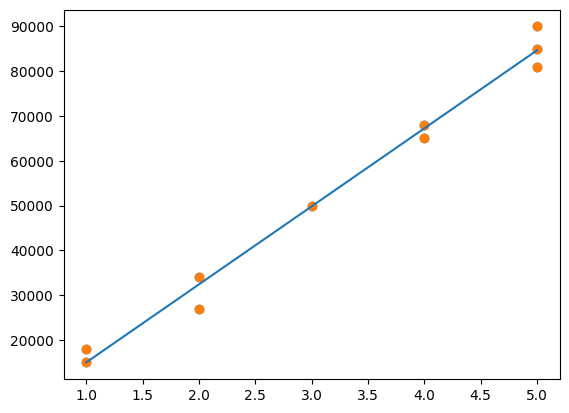

In [ ]:
#latihan 5 linear regresion
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dolar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

#menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

#mulai melatih model
from sklearn.linear_model import LinearRegression

#latih model dengan LinearRegression.fit()
bedrooms = bedrooms.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

#tampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
#latihan 6 logistic regression
import pandas as pd

#membaca dataset dan mengubahnya jadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')
#df.head

#drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

#jalankan proses one hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

#pisahkan atribut dan label
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
X = data[predictions]
y = data['Purchased']

#lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

#bagi data menjadi train dan test untuk setiap atribut dan label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

#latih model dengan fungsi fit
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

#uji akurasi model
model.score(X_test, y_test)

0.825

In [ ]:
#latihan 7 K-means clustering
import pandas as pd

#ubah jadi dataframe
df = pd.read_csv('Mall_Customers.csv')
df.head(3) #lihat 3 data teratas

#preprocessing manual
#ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#ubah data kategorik jadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

#tampilkan data yang sudah di preprocessing
df.head(3)

from sklearn.cluster import KMeans

#menghilangkan kolom customerid dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yg berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

#buat plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
#setelah 5 penurunannya kecil jadi elbownya 5

#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom labels pada dataset
X['Labels'] = km5.labels_

#membuat plot kmeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [ ]:
#latihan 8 sklearn PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

#bagi dataset jadi train dan test
X_train, X_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

#pakai decision tree buat hitung score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

#pakai pca
from sklearn.decomposition import PCA

#membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

#mengaplikasikan pca pada dataset
pca_attributes = pca.fit_transform(X_train)

#melihat variance dari setiap atribut
pca.explained_variance_ratio_

#PCA dengan 2 principal component
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

#uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

In [ ]:
#latihan 9 svm untuk klasifikasi
import pandas as pd

df = pd.read_csv('diabetes.csv')
#df.head()
#df.info()

#memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

#memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

from sklearn.preprocessing import StandardScaler

#standardisasi nilai nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split

#memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC

#membuat object SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

#menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

In [ ]:
#latihan 10 sklearn SVR
import pandas as pd

#membaca dataset dan diubah jadi dataframe
data = pd.read_csv('Salary_Data.csv')

import numpy as np

#memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

#mengubah bentuk atribut
X = X[:,np.newaxis]

from sklearn.svm import SVR

#membangun model dengan parameter C, gamma, kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

#melatih model dengan fungsi fit
model.fit(X,y)

import matplotlib.pyplot as plt

#memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))

<ipython-input-9-b4fe8a7c73cc>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


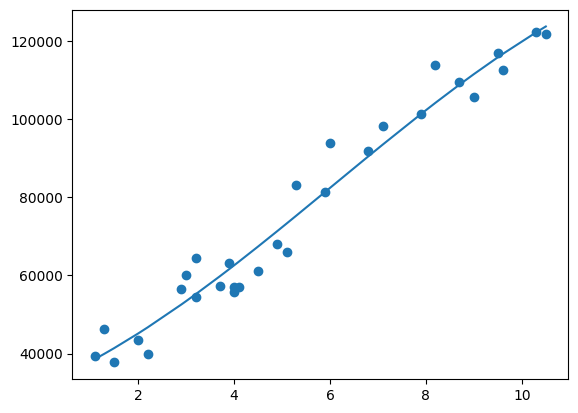

In [ ]:
#latihan 11 sklearn grid search
#kegunaan grid seach untuk mencari parameter terbaik untuk tuning mesin supaya hasil maksimal
import pandas as pd

#membaca dataset dan diubah jadi dataframe
data = pd.read_csv('Salary_Data.csv')

import numpy as np
#memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

#mengubah bentuk atribut
X = X[:, np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000,10000,100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X,y)

#menampilkan parameter terbaik dari grid search
#print(grid_search.best_params_)

#membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X, model_baru.predict(X))

In [ ]:
#mengurangi / menambahkan fitur
#binning -> pengelompokan nilai sesuai dengan batas besaran yang ditentukan
'''data['bin'] = pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])

    value    bin
0      13    Low
1      25    Low
2      32    Mid
3      94    High
4      49    Mid'''

#splitting -> memisahkan atribut jadi atribut atribut baru
#contoh -> full_name jadi first_name dan last_name
"""import pandas as pd

Developer = pd.DataFrame({'Name': ['Axel Sean', 'Leonard Albert', 'Bintang Cahyono', 'Inawati Sutantio'],
                          'Age': [20, 17, 56, 47]})
print("Machine Learning Developer di Indonesia :\n", Developer)

Developer[['First','Last']] = Developer.Name.str.split(expand=True)
print("\n Split Kolom 'Name', lalu tambahkan kedua kolom baru :\n", Developer)"""

#interaction feature -> menciptakan fitur atau atribut baru dari atribut atribut yang ada (perkalian 2 buah fitur)

2.13.0
--2023-10-10 14:01:58--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   171MB/s    in 0.4s    

2023-10-10 14:01:59 (171 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D

Saving download.jpg to download.jpg
Saving e83dcfda80cf389a9f8e181519b0f7bf.jpg to e83dcfda80cf389a9f8e181519b0f7bf.jpg
Saving kamar_axel.jpg to kamar_axel.jpg
1/1 [==============================] - 0s 163ms/step
download.jpg
clean
1/1 [==============================] - 0s 44ms/step
e83dcfda80cf389a9f8e181519b0f7bf.jpg
messy
1/1 [==============================] - 0s 42ms/step
kamar_axel.jpg
clean


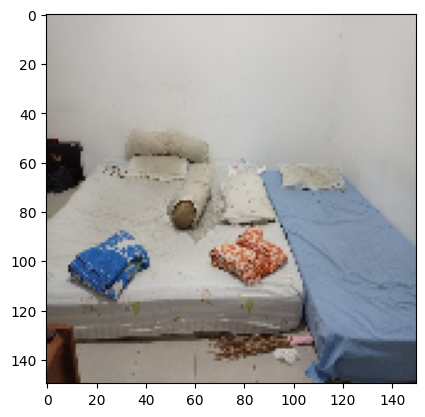

In [ ]:
#latihan 12 klasifikasi gambar, kamar bersih atau berantakan
import tensorflow as tf

#download dataset dari dicoding
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

#melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

#proses augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir, #direktori data latih
            target_size=(150,150), #mengubah resolusi seluruh gambar jadi 150 x 150 pixel
            batch_size=4,
            #karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
            class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir, #direktori data validasi
            target_size=(150,150), #mengubah resolusi seluruh gambar jadi 150 x 150 pixel
            batch_size=4,
            class_mode = 'binary')

#membuat model CNN
model = tf.keras.models.Sequential([
    #hidden layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #hidden layer
    #output layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    #output layer
])

model.summary()

#compile model dengan 'adam' optimizer, loss function dengan 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

#latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=25, #berapa batch yang akan dieksekusi pada tiap epoch
    epochs=20, #tambahkan epoch jika akurasi model belum optimal
    validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps=5, #berapa batch yang akan dieksekusi pada tiap epoch
    verbose=2)

#mengolah gambar lalu dimasukkan ke model
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')